In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

In [3]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print("user uploaded file {name} with length {length} bytes".format(name=fn, length=len(uploaded[fn])))

Saving car data.csv to car data.csv
user uploaded file car data.csv with length 17209 bytes


In [4]:
df = pd.read_csv(r"car data.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
df.shape

(301, 9)

In [6]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [8]:
new_df = df[df.columns.difference(['Car_Name'])]
new_df.head()

,Fuel_Type,Kms_Driven,Owner,Present_Price,Seller_Type,Selling_Price,Transmission,Year
0,Petrol,27000,0,5.59,Dealer,3.35,Manual,2014
1,Diesel,43000,0,9.54,Dealer,4.75,Manual,2013
2,Petrol,6900,0,9.85,Dealer,7.25,Manual,2017
3,Petrol,5200,0,4.15,Dealer,2.85,Manual,2011
4,Diesel,42450,0,6.87,Dealer,4.60,Manual,2014


In [9]:
new_df['current_year'] = 2021
new_df.head()

,Fuel_Type,Kms_Driven,Owner,Present_Price,Seller_Type,Selling_Price,Transmission,Year,current_year
0,Petrol,27000,0,5.59,Dealer,3.35,Manual,2014,2021
1,Diesel,43000,0,9.54,Dealer,4.75,Manual,2013,2021
2,Petrol,6900,0,9.85,Dealer,7.25,Manual,2017,2021
3,Petrol,5200,0,4.15,Dealer,2.85,Manual,2011,2021
4,Diesel,42450,0,6.87,Dealer,4.60,Manual,2014,2021


In [10]:
new_df['years_used'] = new_df['current_year'] - new_df['Year']
new_df.head()

,Fuel_Type,Kms_Driven,Owner,Present_Price,Seller_Type,Selling_Price,Transmission,Year,current_year,years_used
0,Petrol,27000,0,5.59,Dealer,3.35,Manual,2014,2021,7
1,Diesel,43000,0,9.54,Dealer,4.75,Manual,2013,2021,8
2,Petrol,6900,0,9.85,Dealer,7.25,Manual,2017,2021,4
3,Petrol,5200,0,4.15,Dealer,2.85,Manual,2011,2021,10
4,Diesel,42450,0,6.87,Dealer,4.60,Manual,2014,2021,7


In [11]:
new_df.drop(['Year','current_year'],axis=1,inplace=True)

In [12]:
new_df.head()

,Fuel_Type,Kms_Driven,Owner,Present_Price,Seller_Type,Selling_Price,Transmission,years_used
0,Petrol,27000,0,5.59,Dealer,3.35,Manual,7
1,Diesel,43000,0,9.54,Dealer,4.75,Manual,8
2,Petrol,6900,0,9.85,Dealer,7.25,Manual,4
3,Petrol,5200,0,4.15,Dealer,2.85,Manual,10
4,Diesel,42450,0,6.87,Dealer,4.60,Manual,7


In [13]:
new_df.corr()

,Kms_Driven,Owner,Present_Price,Selling_Price,years_used
Kms_Driven,1.000000,0.089216,0.203647,0.029187,0.524342
Owner,0.089216,1.000000,0.008057,-0.088344,0.182104
Present_Price,0.203647,0.008057,1.000000,0.878983,0.047584
Selling_Price,0.029187,-0.088344,0.878983,1.000000,-0.236141
years_used,0.524342,0.182104,0.047584,-0.236141,1.000000


In [14]:
new_df=pd.get_dummies(new_df,drop_first=True)

In [15]:
new_df.head()

,Kms_Driven,Owner,Present_Price,Selling_Price,years_used,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,27000,0,5.59,3.35,7,0,1,0,1
1,43000,0,9.54,4.75,8,1,0,0,1
2,6900,0,9.85,7.25,4,0,1,0,1
3,5200,0,4.15,2.85,10,0,1,0,1
4,42450,0,6.87,4.60,7,1,0,0,1


In [17]:
x=new_df.drop('Selling_Price',axis=1)
y=new_df['Selling_Price']

In [18]:
x.head()


,Kms_Driven,Owner,Present_Price,years_used,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,27000,0,5.59,7,0,1,0,1
1,43000,0,9.54,8,1,0,0,1
2,6900,0,9.85,4,0,1,0,1
3,5200,0,4.15,10,0,1,0,1
4,42450,0,6.87,7,1,0,0,1


In [19]:
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

In [21]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [22]:
print(model.feature_importances_)

[0.04489864 0.00088637 0.40469672 0.07526604 0.20389935 0.02008924
 0.12923824 0.12102541]


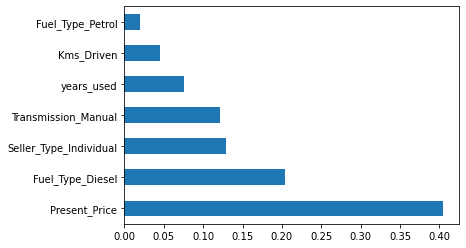

In [23]:
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(7).plot(kind='barh')
plt.show()

In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [25]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [ ]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

In [ ]:
rf = RandomForestRegressor()
rf_random = GridSearchCV(estimator = rf, param_grid = random_grid,scoring='neg_mean_squared_error', cv = 5, verbose=2, n_jobs = 1)

In [ ]:
rf_random.fit(X_train,y_train)

In [26]:
regressor=RandomForestRegressor(max_depth=15,
 max_features= 'auto',
 min_samples_leaf= 1,
 min_samples_split= 2,
 n_estimators= 100
)

In [27]:
regressor.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=15, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [28]:
prediction=regressor.predict(x_test)

In [30]:
prediction

array([ 0.4566,  6.398 ,  7.2055,  7.381 ,  0.2772,  5.133 ,  5.0405,
        6.6995,  0.5556,  8.45  ,  5.183 ,  1.1146,  0.2044,  3.6805,
        8.7376,  3.994 ,  3.917 ,  0.5583,  3.929 ,  9.8683,  5.1415,
        2.74  ,  7.1605,  7.9825,  0.5525,  5.8805,  0.4313,  4.0875,
        5.5865,  4.8615,  3.3185,  8.4549,  0.7149, 10.0709,  4.648 ,
        0.6639,  3.612 ,  0.2214,  5.0215,  2.7171,  0.776 ,  5.1715,
        7.0458, 12.2464,  0.5688,  4.5875,  0.271 ,  9.0988,  4.0835,
       11.0585,  3.892 ,  1.2224,  6.1811,  0.4184,  5.5865,  4.562 ,
        0.4436,  0.3702,  5.265 ,  8.932 ,  0.2699,  7.4995,  0.4675,
        7.137 ,  6.472 ,  5.1805, 16.4186,  0.4014,  3.844 ,  5.7604,
        0.4643,  4.4567,  0.6821,  3.4565,  3.6695,  5.212 ,  7.9825,
        1.1369,  0.5501,  3.504 ,  4.8779,  5.087 ,  0.2451,  2.928 ,
        4.2301,  8.9691,  0.2966,  1.21  ,  6.3205,  1.0866,  5.705 ])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


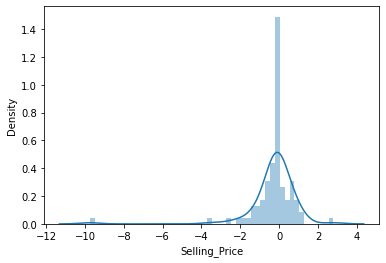

In [29]:
sb.distplot(y_test-prediction)

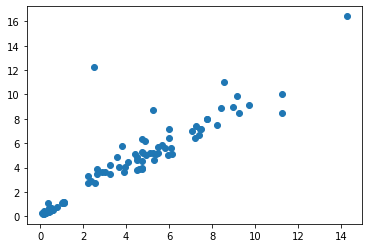

In [31]:
plt.scatter(y_test,prediction)

In [33]:
from sklearn import metrics

In [34]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))


MAE: 0.6240054945054945
MSE: 1.7141188053846155
RMSE: 1.309243600474952


In [36]:
import pickle
# open a file, where you ant to store the data
file = open('random_forest_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(regressor, file)